# TISSUE run times (single-threaded) 

This notebook contains code for plotting the runtime results from the CSV output files from `spatial_conformal_uncertainty.py`. The specific parameters used can be found in the job scripts of form `run_conformal_{i}.slurm` for all datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import scanpy as sc
from scipy.stats import pearsonr, spearmanr
import anndata as ad
import seaborn as sns
import pickle

In [2]:
#### Swap dataset names to real identifiers
dataset_mapper = {"Dataset3": "Mouse Hipp.\n(seqFISH)",
                  "Dataset9": "Mouse VISP\n(MERFISH)",
                  "Dataset11": "Mouse PC\n(STARmap)", 
                  "Dataset12": "Human MTG\n(ISS)",
                  "Dataset13": "Mouse VISP\n(ISS)",
                  "Dataset14": "Drosophila Embryo\n(FISH)",
                  "Dataset15": "Mouse SC\n(osmFISH)",
                  "Dataset17": "Mouse VISP\n(ExSeq)",
                  "Axolotl": "Axolotl Brain\n(Stereo-seq)",
                  "Dataset7": "Human U2OS\n(MERFISH)",
                  "Dataset1": "Mouse Gast.\n(seqFISH)"}

method_mapper = {"tangram": "Tangram",
                 "spage": "SpaGE",
                 "knn": "Harmony",
                 "gimvi": "gimVI"}
####

## Make plots of runtimes based on different parts of the TISSUE pipeline

Read in runtimes data saved as part of `spatial_conformal_uncertainty.py`

/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


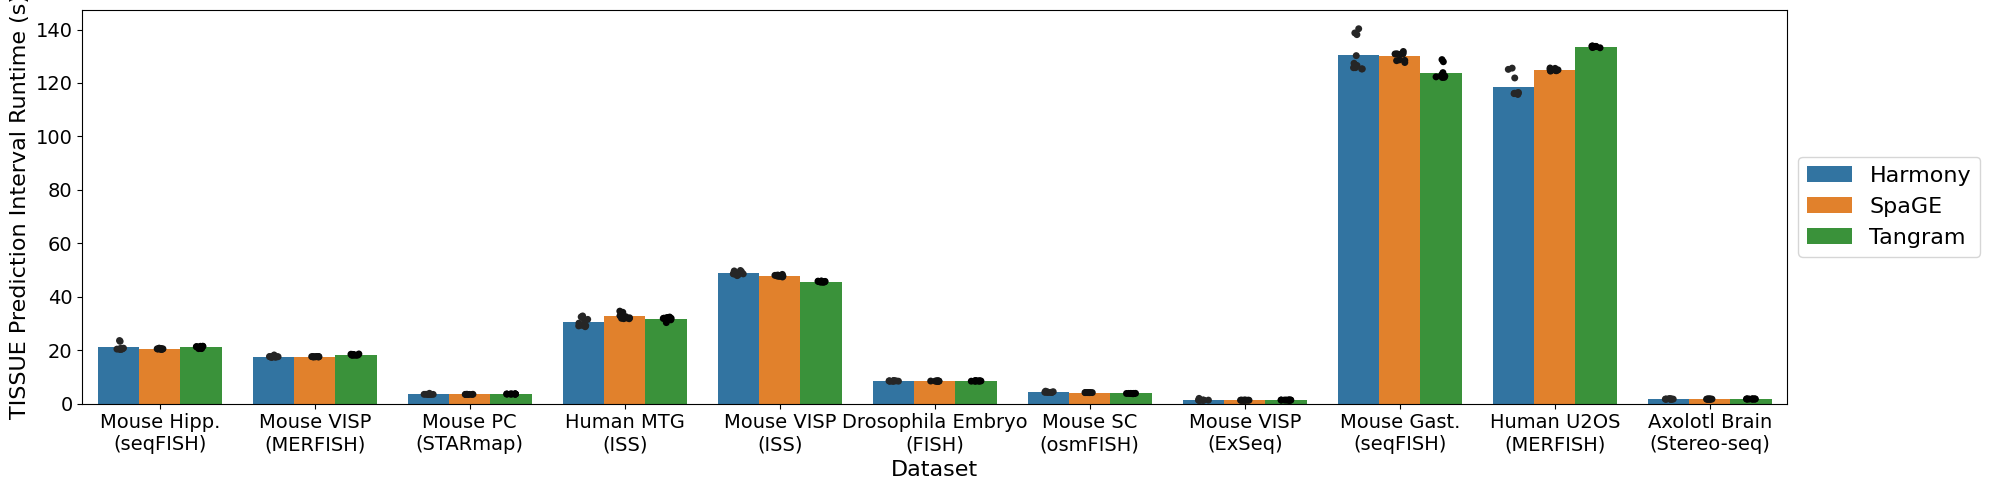

/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


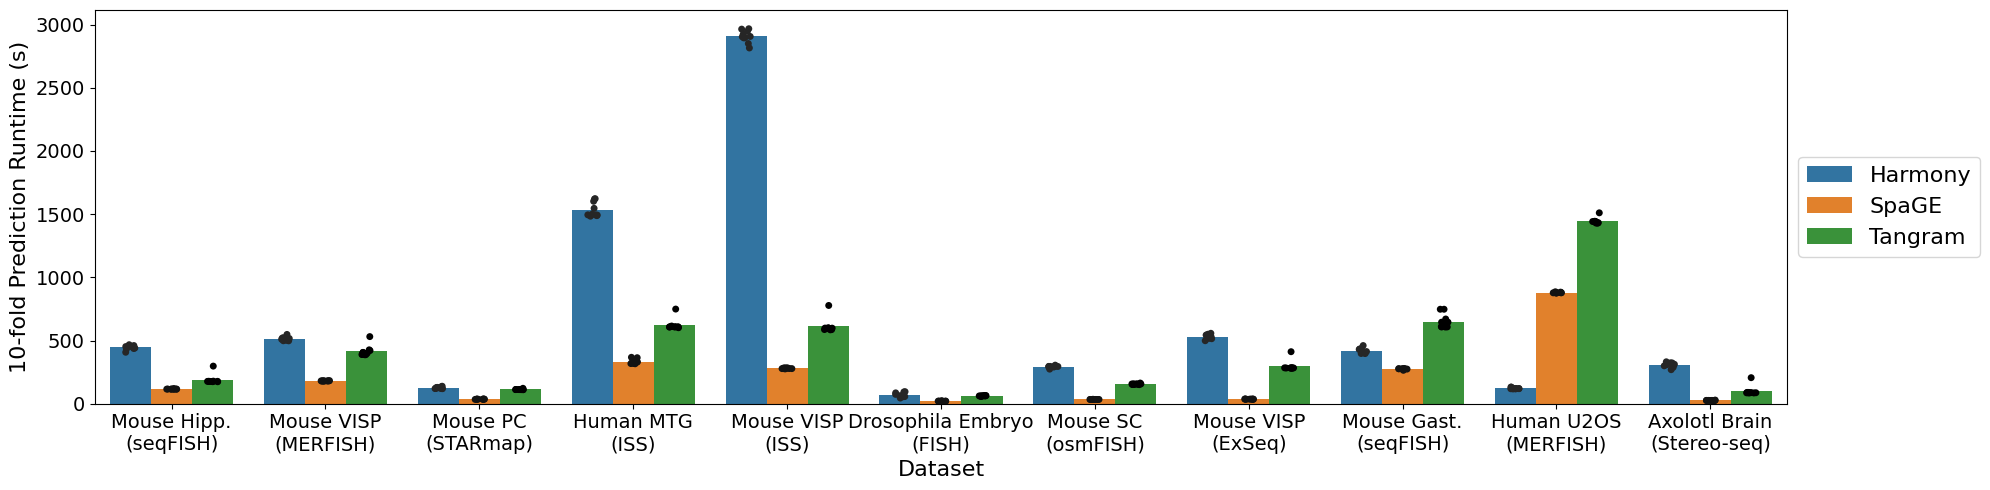

In [17]:
datasets = ["Dataset3", "Dataset9", "Dataset11", "Dataset12", "Dataset13", "Dataset14", "Dataset15", "Dataset17", "Dataset1", "Dataset7", "Axolotl"]
methods = ['knn', 'spage', 'tangram']

#-------------------------------------------------

# concatenate results from all datasets
for i, d in enumerate(datasets):
    df = pd.read_csv(f"scg_results/scpi/2023Aug1_k4k1_SDbasedCCPplus1/runtimes_"+d+"_knn_spage_tangram_SCPI.csv")
    df["Dataset"] = d
    if i == 0:
        combined_df = df
    else:
        combined_df = pd.concat([combined_df, df])

# Map identifiers to more detailed versions
combined_df = combined_df.replace({"Dataset": dataset_mapper})
combined_df = combined_df.replace({"method": method_mapper})

# Generate barplot of the runtimes for making TISSUE prediction intervals
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="Dataset", y="conformalize_time", hue="method", data=combined_df, ax=ax, errorbar=None)
sns.stripplot(x="Dataset", y="conformalize_time", hue="method", color='k', data=combined_df, dodge=True, size=5, ax=ax,
             legend=False)
plt.xlabel("Dataset", fontsize=16)
plt.ylabel(r"TISSUE Prediction Interval Runtime (s)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, ncol=1)
plt.tight_layout()
plt.savefig('plots/scpi_datasets/REVISED_runtime_conformalize.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Generate barplot of the runtimes for doing 10-fold prediction
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="Dataset", y="predict_time", hue="method", data=combined_df, ax=ax, errorbar=None)
sns.stripplot(x="Dataset", y="predict_time", hue="method", color='k', data=combined_df, dodge=True, size=5, ax=ax,
             legend=False)
plt.xlabel("Dataset", fontsize=16)
plt.ylabel(r"10-fold Prediction Runtime (s)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, ncol=1)
plt.tight_layout()
plt.savefig('plots/scpi_datasets/REVISED_runtime_prediction.pdf', dpi=300, bbox_inches='tight')
plt.show()

### Run-times for TISSUE with automatic stratified grouping

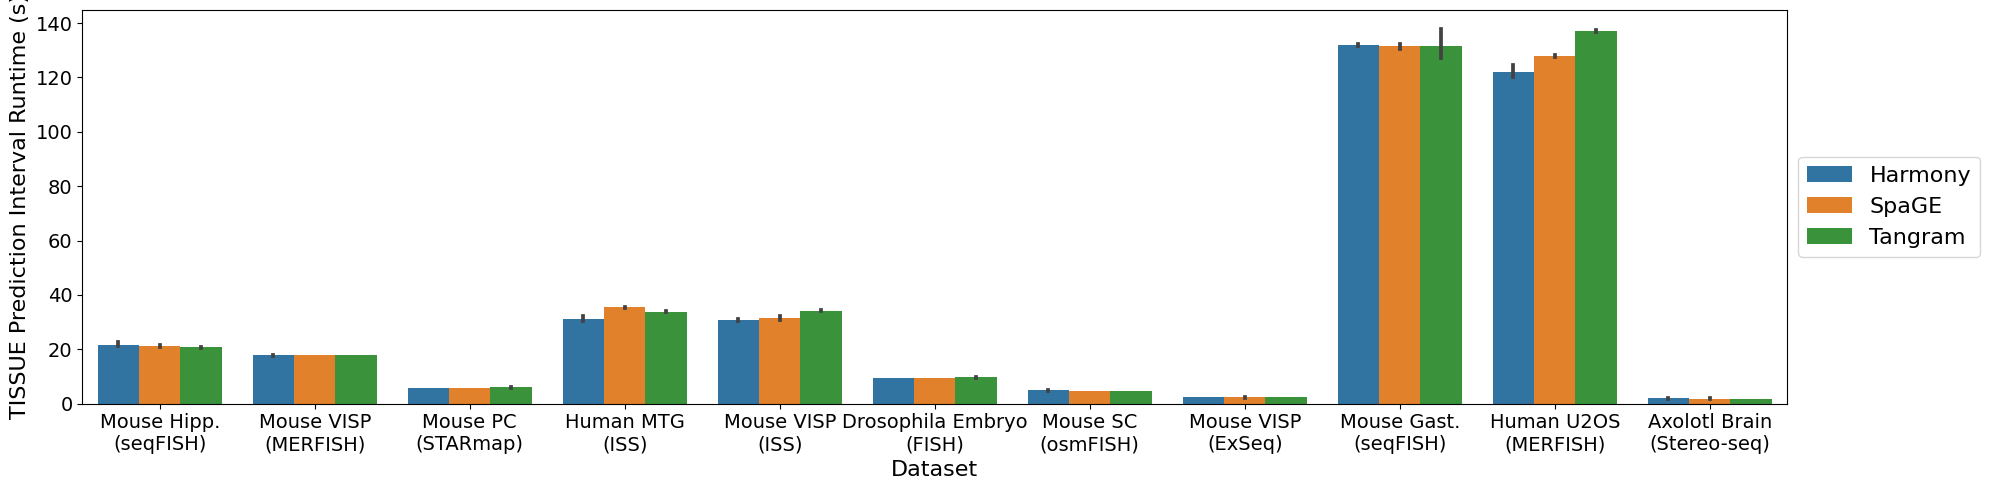

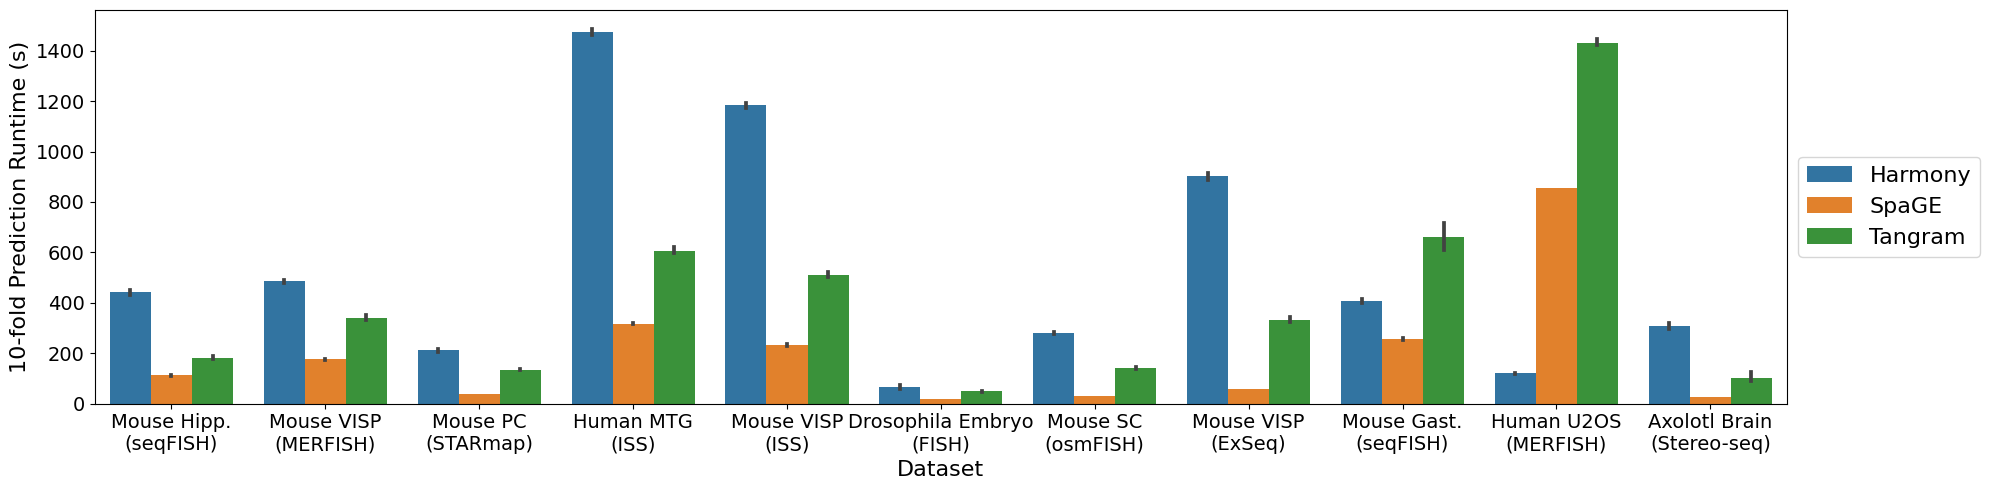

In [4]:
datasets = ["Dataset3", "Dataset9", "Dataset11", "Dataset12", "Dataset13", "Dataset14", "Dataset15", "Dataset17", "Dataset1", "Dataset7", "Axolotl"]
methods = ['knn', 'spage', 'tangram']

#----------------------------------------------------------------------------------

# concatenate results from all datasets
for i, d in enumerate(datasets):
    df = pd.read_csv(f"scg_results/scpi/2023Aug1_kautokauto_SDbasedCCPplus1/runtimes_"+d+"_knn_spage_tangram_SCPI.csv")
    df["Dataset"] = d
    if i == 0:
        combined_df = df
    else:
        combined_df = pd.concat([combined_df, df])

# Map identifiers to more detailed versions
combined_df = combined_df.replace({"Dataset": dataset_mapper})
combined_df = combined_df.replace({"method": method_mapper})

# Generate barplot of the runtimes for making TISSUE prediction intervals
plt.figure(figsize=(20,5))
sns.barplot(x="Dataset", y="conformalize_time", hue="method", data=combined_df)
plt.xlabel("Dataset", fontsize=16)
plt.ylabel(r"TISSUE Prediction Interval Runtime (s)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, ncol=1)
plt.tight_layout()
plt.savefig('plots/scpi_datasets/REVISED_runtime_conformalize_kautoauto.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Generate barplot of the runtimes for doing 10-fold prediction
plt.figure(figsize=(20,5))
sns.barplot(x="Dataset", y="predict_time", hue="method", data=combined_df)
plt.xlabel("Dataset", fontsize=16)
plt.ylabel(r"10-fold Prediction Runtime (s)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, ncol=1)
plt.tight_layout()
plt.savefig('plots/scpi_datasets/REVISED_runtime_prediction_kautokauto.pdf', dpi=300, bbox_inches='tight')
plt.show()